# BatchIterator

In [1]:
from wholeslidedata.iterators import create_batch_iterator
from wholeslidedata.visualization.plotting import plot_batch
from dicfg.magics import ConfigMagics

# This will allow loading yaml in an notebook cell
ConfigMagics.register_magics()

## User config

Configuring the BatchIterator of wholeslidedata requires a configuration file. While most settings have default values that can be overridden, the data, labels, and batch shape settings must be provided by the user. In the example below, we illustrate how to set these parameters using a YAML configuration file. This YAML file is automatically converted into a Python dictionary called "user_config" using the "yaml" magic function. It is important to note that "user_config" can also be a path to a YAML/JSON file or a pre-existing Python dictionary.

In [33]:
%%yaml user_config 

wholeslidedata:
    default:
        yaml_source:
            training:
            -   wsi: 
                    path: "/data/datasets/nki/slides/1285/195530/T17-00070 A1 PD-L1 (22C3).svs"
                wsa: 
                    path: "/data/annotations/v7/nki-pdl1/releases/v1.0.0/NKI-1285-T17-00070-A1-PDL1-22C3-195530.json"


        labels:
            "necrotic (area)": 1
            "fat cell (area)": 2
            "artefacts": 3
            "lymphoid aggregate (area)": 4
            "blood vessel (area)": 5
            "tumor (area)": 6
            "stroma (area)": 7

        annotation_parser:
            "*object": wholeslidedata.interoperability.v7.parser.V7AnnotationParser
            callbacks:
                - "*object": wholeslidedata.annotation.callbacks.TiledAnnotationCallback
                  tile_size: 256
                  label_names: ${_labels.names}
                  overlap: 128
                  full_coverage: True

        label_sampler:
            labels: ['tile']
        annotation_sampler_name: OrderedAnnotationSampler
        point_sampler_name: CenterPointSampler

        batch_shape:
            batch_size: 4
            spacing: 0.5
            shape: [256, 256, 3]

:::{seealso}
 - For more information about the **mode**, please see the user guide about [modes](./modes)
 - For an explanation about the **user_config** please see the [batchiterator configuration](/userguide/index.html#batchiterator-configuration)
:::

## Creating a Batch Iterator

None
{'tile': 55}
None
None
{'tile': 55}
{'tile': 55}
{'mode': 'training', 'sample_references': [{'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=0), 'point': (43723, 15290)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=1), 'point': (43723, 15418)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=2), 'point': (43723, 15546)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=3), 'point': (43723, 15674)}], 'index': 0}


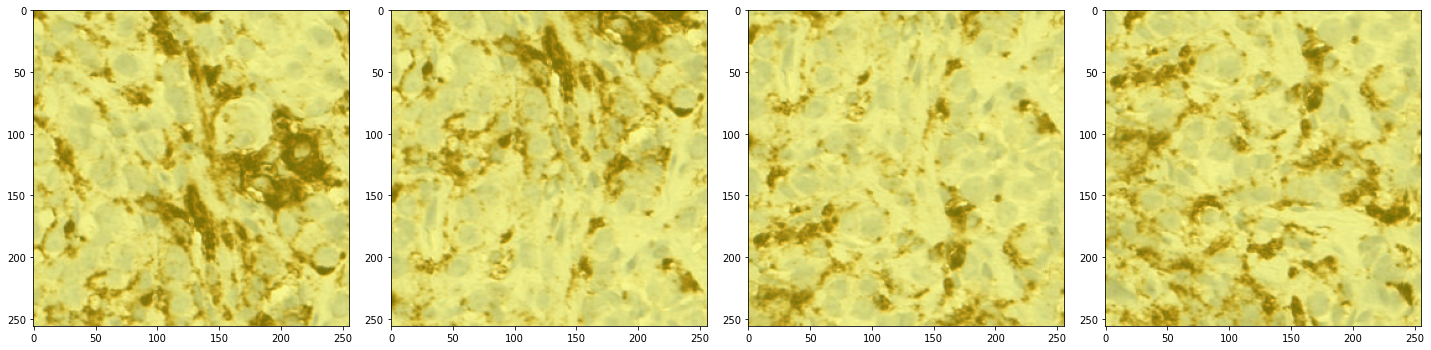

{'mode': 'training', 'sample_references': [{'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=0), 'point': (43723, 15290)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=1), 'point': (43723, 15418)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=2), 'point': (43723, 15546)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=3), 'point': (43723, 15674)}], 'index': 0}


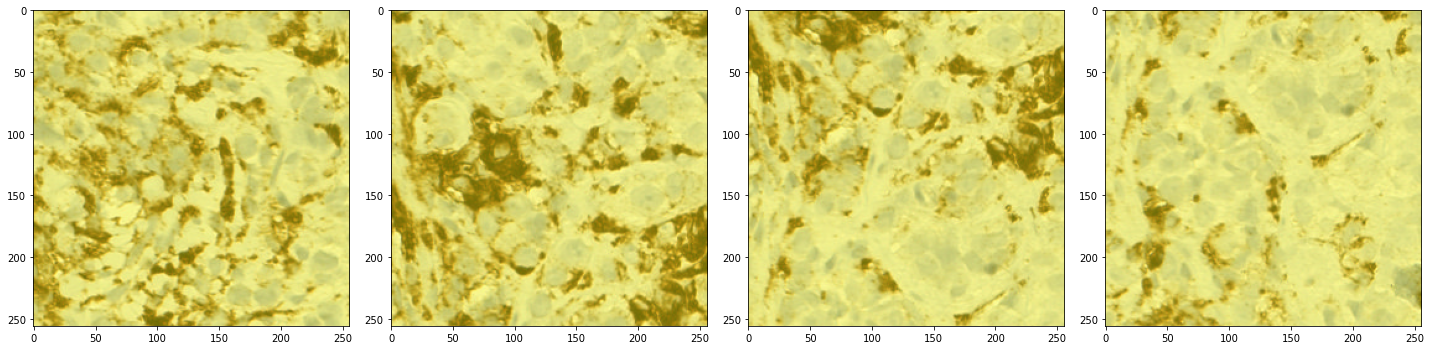

In [35]:
training_batch_generator = create_batch_iterator(user_config=user_config, mode='training')
    
    
x_batch, y_batch, info =  next(training_batch_generator)
print(info)
plot_batch(x_batch, y_batch)
print(info)
x_batch, y_batch, info =  next(training_batch_generator)
plot_batch(x_batch, y_batch)
# training_batch_generator.stop()

{'mode': 'training', 'sample_references': [{'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=21), 'point': (44235, 15418)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=22), 'point': (44235, 15546)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=23), 'point': (44235, 15674)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=24), 'point': (44235, 15802)}], 'index': 19}


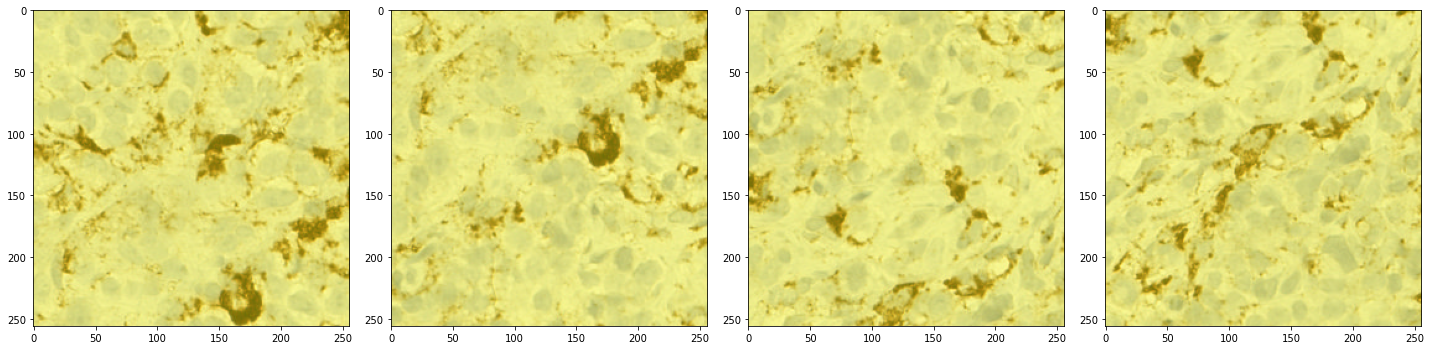

{'mode': 'training', 'sample_references': [{'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=25), 'point': (44363, 15290)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=26), 'point': (44363, 15418)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=27), 'point': (44363, 15546)}, {'reference': WholeSlideSampleReference(file_index=0, file_key='0', wsa_index=0, annotation_index=28), 'point': (44363, 15674)}], 'index': 20}


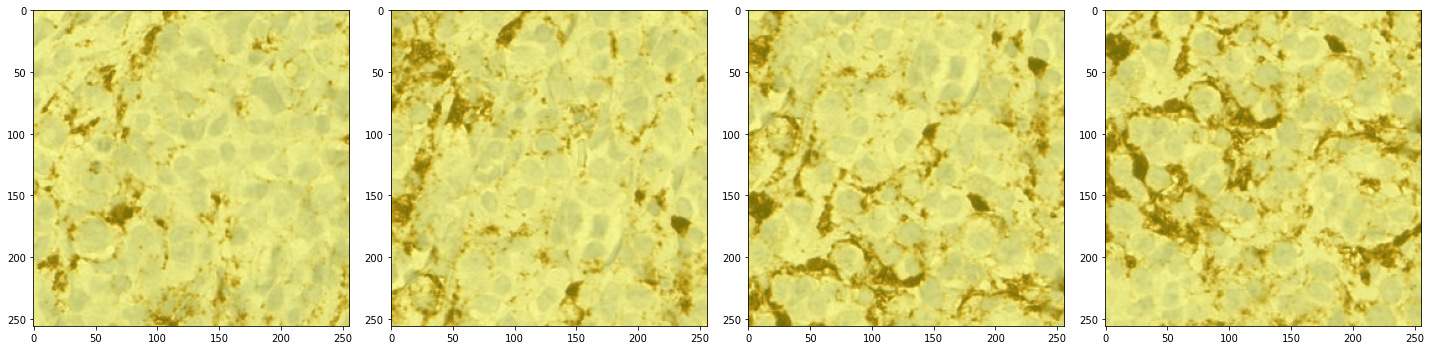

In [45]:
print(info)
x_batch, y_batch, info =  next(training_batch_generator)
plot_batch(x_batch, y_batch)
print(info)
x_batch, y_batch, info =  next(training_batch_generator)
plot_batch(x_batch, y_batch)

:::{seealso}
For more advanced initialization settings of the batch iterator please see the [initialize batch iterator](./initializebatchiterator) user guide
:::